In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
crimes = pd.read_csv('crime.csv')
crimes['SHOOTINGS'] = crimes['SHOOTING'].replace(['Y'],1)
crimes['SHOOTING'] = crimes['SHOOTING'].fillna(0)
crimes['SHOOTING'] = crimes['SHOOTING'].astype('bool')
crimes

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,SHOOTINGS
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,False,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",NaN
1,I182070943,1402,Vandalism,VANDALISM,C11,347,False,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",NaN
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,False,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",NaN
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,False,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",NaN
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,False,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,False,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)",NaN
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,False,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",NaN
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,False,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",NaN
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,False,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)",NaN


## How many crimes happened each month? 

In [3]:
num_of_crime = crimes.groupby('MONTH').MONTH.count()
df = pd.DataFrame(data= num_of_crime)

Text(0, 0.5, 'Number of Crimes')

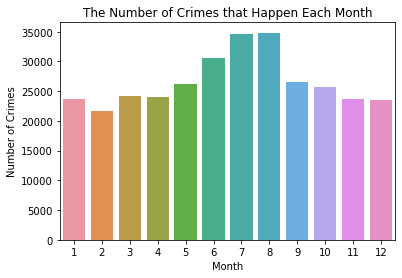

In [4]:
sns.barplot(x = df.index, y = df.MONTH, data = df)
plt.title('The Number of Crimes that Happen Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')

## What is the relationship between the month and the number of times a certain crime happened?

<AxesSubplot:xlabel='MONTH'>

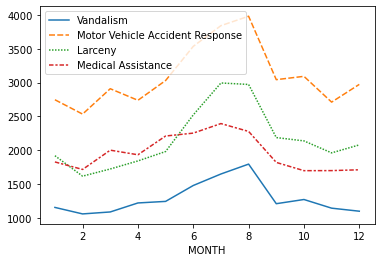

In [54]:
grouped = crimes.groupby(crimes.OFFENSE_CODE_GROUP)
vandalism = grouped.get_group("Vandalism")
vandalism = vandalism.sort_values('MONTH', ascending = True)
vand_num = pd.DataFrame(vandalism.groupby('MONTH').MONTH.count())
vand_num.rename(columns={'MONTH': 'Vandalism'}, inplace=True)

mvar = grouped.get_group("Motor Vehicle Accident Response")
mvar = mvar.sort_values('MONTH', ascending = True)
mvar_num = pd.DataFrame(mvar.groupby('MONTH').MONTH.count())
mvar_num.rename(columns={'MONTH': 'Motor Vehicle Accident Response'}, inplace=True)

larceny = grouped.get_group("Larceny")
larceny = larceny.sort_values('MONTH', ascending = True)
larceny_num = pd.DataFrame(larceny.groupby('MONTH').MONTH.count())
larceny_num.rename(columns={'MONTH': 'Larceny'}, inplace=True)

medical_assist = grouped.get_group("Medical Assistance")
medical_assist = medical_assist.sort_values('MONTH', ascending = True)
med_assist_num = pd.DataFrame(medical_assist.groupby('MONTH').MONTH.count())
med_assist_num.rename(columns={'MONTH': 'Medical Assistance'}, inplace=True)


df = pd.concat([vand_num, mvar_num, larceny_num, med_assist_num], axis=1)
sns.lineplot(data = df)

In [55]:
# to rename the columns and inplace them, i used https://stackoverflow.com/questions/11346283/renaming-column-names-in-pandas
# to seperate the types of crimes (grouped.get_group) i used https://www.kite.com/python/answers/how-to-split-a-pandas-dataframe-into-multiple-dataframes-by-column-value-in-python

In [8]:
# do something with shootings

In [9]:
crimes[crimes.isin(['EU']).any(axis=1)]

group     0                      Larceny
          1                    Vandalism
          2                        Towed
          3         Investigate Property
          4         Investigate Property
                            ...         
district  319068                      D4
          319069                     E18
          319070                     E18
          319071                     E13
          319072                      D4
Length: 638146, dtype: object